# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# custom modules
from loadData import LoadData, CocoHelper

# Objects

In [2]:
dataDir= "../data/coco/"

ld_ob = LoadData(dataDir)    # (dataDir='../data/coco/')
co_ob = CocoHelper(dataDir) # (dataDir='../data/coco/', dataType=['train2017', 'val2017'])



coco1, coco2 = co_ob.coco1, co_ob.coco2 # train, val objects of coco
cc1, cc2 = co_ob.coco1['loaded_annFile'], co_ob.coco2['loaded_annFile'] # train, val loaded annptations

loading annotations into memory...
Done (t=22.52s)
creating index...
index created!

loading annotations into memory...
Done (t=0.87s)
creating index...
index created!



# Generating Masks

In [3]:
import joblib
from tqdm import tqdm
from skimage import io

In [4]:
train_df = joblib.load("./picklefiles/train_dataframes/train_person_df.1")
val_df = joblib.load("./picklefiles/val_dataframes/val_person_df.1")

img_path_df = joblib.load("./picklefiles/img_path_df")
master_df_train = joblib.load("./picklefiles/train_master_df")
master_df_val = joblib.load("./picklefiles/val_master_df")

In [5]:
train_df.head()

id                                     path
0  214972  ../data/coco/train2017/000000214972.jpg
1  445425  ../data/coco/train2017/000000445425.jpg
2  222024  ../data/coco/train2017/000000222024.jpg
3  238712  ../data/coco/train2017/000000238712.jpg
4  199990  ../data/coco/train2017/000000199990.jpg

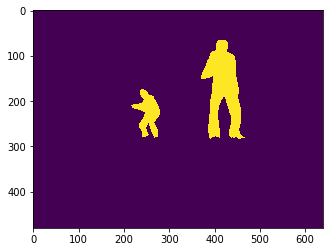

In [10]:
img_id = 214972
cat_id = 1

reqd_mask = co_ob.get_mask_of_image(cc1, img_id , cat_id, img_path_df, master_df_train)

plt.imshow(reqd_mask)

In [7]:
train_ids = train_df['id'].values
val_ids = val_df['id'].values

In [8]:
train_ids[0]

214972

In [17]:
root_path = "../data/coco-person/train/person_masks/masks/"
for i in tqdm(train_ids):
    reqd_mask = co_ob.get_mask_of_image(cc1, i , cat_id, img_path_df, master_df_train)
    # io.imshow(reqd_mask)
    # print(root_path+str(i)+".jpg")
    req_path = root_path+str(i)+".jpg"
    plt.imsave(req_path,reqd_mask)
    # break

100%|██████████| 64115/64115 [21:02<00:00, 50.79it/s]


In [18]:
root_path = "../data/coco-person/val/person_masks/masks/"
for i in tqdm(val_ids):
    reqd_mask = co_ob.get_mask_of_image(cc2, i , cat_id, img_path_df, master_df_val)
    
    # print(root_path+str(i)+".jpg")
    req_path = root_path+str(i)+".jpg"
    plt.imsave(req_path,reqd_mask)

100%|██████████| 2693/2693 [00:52<00:00, 51.36it/s]
